# Ivan Velazquez - Python para Análisis de Datos - Isaias Andre - 2020-01

## Los Simpson

###### Importacion de librerias y definición de constantes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

PATH_SIMPSONS_CHARACTERS = "/mnt/NFS/Documentos/03.Software/03.Ejercicios programacion/04.Analisis de Datos con Python - EdIT/Simpsons datasets/characters.csv"
PATH_SIMPSONS_EPISODES = "/mnt/NFS/Documentos/03.Software/03.Ejercicios programacion/04.Analisis de Datos con Python - EdIT/Simpsons datasets/episodes.csv"
PATH_SIMPSONS_LOCATIONS = "/mnt/NFS/Documentos/03.Software/03.Ejercicios programacion/04.Analisis de Datos con Python - EdIT/Simpsons datasets/locations.csv"
PATH_SIMPSONS_LINES = "/mnt/NFS/Documentos/03.Software/03.Ejercicios programacion/04.Analisis de Datos con Python - EdIT/Simpsons datasets/script_lines.csv"

In [2]:
simpsons_characters = pd.read_csv(PATH_SIMPSONS_CHARACTERS)
simpsons_episodes = pd.read_csv(PATH_SIMPSONS_EPISODES)
simpsons_locations = pd.read_csv(PATH_SIMPSONS_LOCATIONS)
simpsons_lines = pd.read_csv(PATH_SIMPSONS_LINES)

### Personajes principales

In [3]:
simpsons_characters[simpsons_characters["name"].str.lower().str.contains("simps") & ~simpsons_characters["gender"].str.contains("NaN", na=True)]

,id,name,normalized_name,gender
70,1,Marge Simpson,marge simpson,f
71,8,Bart Simpson,bart simpson,m
72,9,Lisa Simpson,lisa simpson,f
76,31,Grampa Simpson,grampa simpson,m
407,414,Mona Simpson,mona simpson,f
6659,2,Homer Simpson,homer simpson,m


Donde se ve la igualdad de genero con la misma cantidad de personajes masculinos y femeninos

### Top 10 de personajes secundarios con mas dialogos

In [70]:
simpsons_lines.dropna(inplace=True)
simpsons_characters.dropna(inplace=True)
most_lines = simpsons_lines["character_id"].value_counts()
most_lines = most_lines.reset_index().rename(columns={"index":"character_id", "character_id": "lines"})

not_simpson = simpsons_characters[(~simpsons_characters["normalized_name"].str.lower().str.contains("simpson"))]

result = pd.merge(not_simpson, most_lines, left_on="id", right_on="character_id", how="inner")
result = result.sort_values(by=['lines'], ascending=False).head(10)
result

,id,name,normalized_name,gender,character_id,lines
255,15,C. Montgomery Burns,c montgomery burns,m,15.0,3120
0,17,Moe Szyslak,moe szyslak,m,17.0,2807
1,3,Seymour Skinner,seymour skinner,m,3.0,2387
2,11,Ned Flanders,ned flanders,m,11.0,2054
3,71,Chief Wiggum,chief wiggum,m,71.0,1796
4,25,Milhouse Van Houten,milhouse van houten,m,25.0,1795
256,139,Krusty the Clown,krusty the clown,m,139.0,1702
6,101,Nelson Muntz,nelson muntz,m,101.0,1145
33,165,Lenny Leonard,lenny leonard,m,165.0,1143
32,208,Apu Nahasapeemapetilon,apu nahasapeemapetilon,m,208.0,988


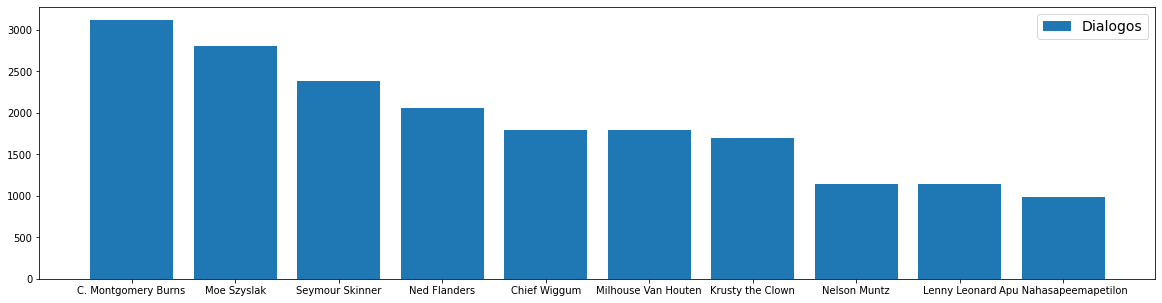

In [71]:
f, ax = plt.subplots(figsize=(20,5))
plt.bar(result["name"], result["lines"], label = 'Dialogos')
ax.legend(fontsize = 14)

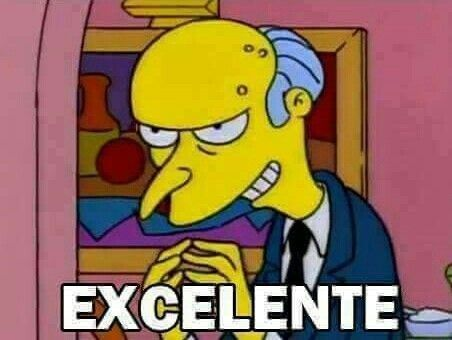

### Top 10 capitulos mas populares

In [5]:
simpsons_episodes.sort_values(by=["imdb_rating", "imdb_votes"], ascending=False).head(10)[["title", "season", "number_in_season", "original_air_date", "imdb_rating", "imdb_votes"]]

,title,season,number_in_season,original_air_date,imdb_rating,imdb_votes
536,You Only Move Twice,8,2,1996-11-03,9.2,2439.0
538,Homer's Enemy,8,23,1997-05-04,9.2,2256.0
324,The City of New York vs. Homer Simpson,9,1,1997-09-21,9.1,1918.0
535,Who Shot Mr. Burns? (Part One),6,25,1995-05-21,9.1,1619.0
255,Marge vs. the Monorail,4,12,1993-01-14,9.0,2028.0
528,Cape Feare,5,2,1993-10-07,9.0,2010.0
263,Last Exit to Springfield,4,17,1993-03-11,9.0,1827.0
60,The Springfield Files,8,10,1997-01-12,9.0,1793.0
527,Homer the Heretic,4,3,1992-10-08,9.0,1747.0
533,Treehouse of Horror V,6,6,1994-10-30,9.0,1690.0


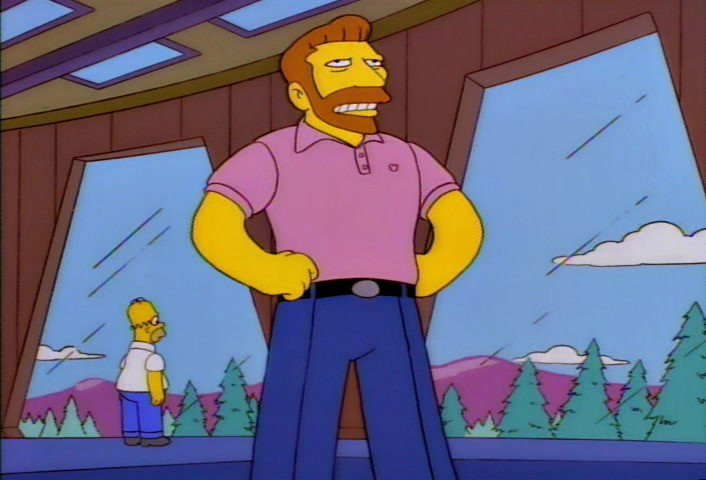

### Top 10 capitulos menos populares

In [6]:
simpsons_episodes.sort_values(by=["imdb_rating", "imdb_votes"], ascending=True).head(10)[["title", "season", "number_in_season", "original_air_date", "imdb_rating", "imdb_votes"]]

,title,season,number_in_season,original_air_date,imdb_rating,imdb_votes
194,Lisa Goes Gaga,23,22,2012-05-20,4.5,1215.0
72,"All Singing, All Dancing",9,11,1998-01-04,5.1,1119.0
108,Gump Roast,13,17,2002-04-21,5.6,721.0
189,Moe Goes from Rags to Riches,23,12,2012-01-29,5.7,562.0
172,The Greatest Story Ever D'ohed,21,16,2010-03-28,5.7,675.0
217,The Musk Who Fell to Earth,26,12,2015-01-25,5.8,439.0
498,What to Expect When Bart's Expecting,25,19,2014-04-27,5.8,445.0
512,Clown in the Dumps,26,1,2014-09-28,5.8,652.0
504,Every Man's Dream,27,1,2015-09-27,5.9,532.0
591,Lisa the Drama Queen,20,9,2009-01-25,5.9,706.0


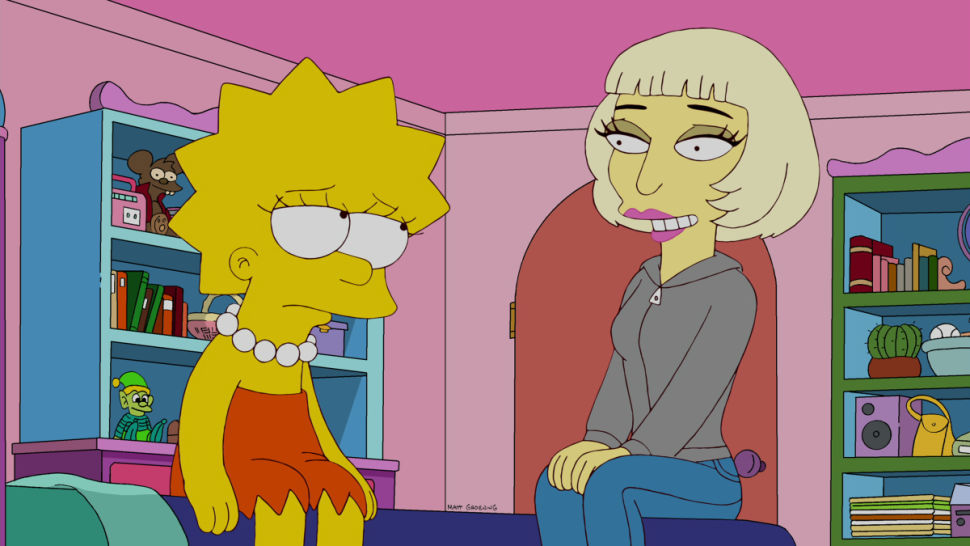

### Un dialogo random de cada mejor episodio

In [7]:
simpsons_lines["word_count"] = simpsons_lines["character_id"].astype("int64")

merge = pd.merge(simpsons_lines, simpsons_episodes, left_on="episode_id", right_on="id", how="inner")
merge = merge[(merge["speaking_line"] == True) & (merge["word_count"] > 9.0) & (merge["raw_character_text"] != "NaN")].groupby("episode_id").sample(n=1)

pd.options.display.max_colwidth = 200

merge.sort_values(by=["imdb_rating", "imdb_votes"], ascending=False).head(10)[["title", "raw_character_text", "spoken_words"]]

,title,raw_character_text,spoken_words
117125,You Only Move Twice,Worker #2,"I'm sorry, we're just a little tired, sir. We've been pushing ourselves real hard to get the reactor on-line."
119024,Homer's Enemy,Lenny Leonard,Pipe down!
78217,The City of New York vs. Homer Simpson,Duffman,Duffman wants to party down with the man who sent in ten thousand Duff labels to bring me here today. I've got a bottomless mug of new Duff Extra Cold for... BARNEY GUMBEL!
75594,Who Shot Mr. Burns? (Part One),Veterinarian,"Oops, almost forgot. Wouldn't want you gnawing on those casts, eh boy?"
98200,Marge vs. the Monorail,Reporter,Should we take our hidden camera?
65929,Cape Feare,MRS KRABAPPEL,"... in our school production of ""Lizzie Borden,"" starring Martin Prince as Lizzie!"
65724,Last Exit to Springfield,C. Montgomery Burns,"I mean, if I should slip something into your pocket, what's the harm?"
128914,The Springfield Files,Dana Scully,"No, this is much more irritating. I've seen enough, Mulder. Let's go."
96422,Homer the Heretic,God,BUT WHAT?
109591,Treehouse of Horror V,C. Montgomery Burns,"This house has quite a long and colorful history. It was built on an ancient Indian burial ground, and was the setting of satanic rituals, witch burnings, and five John Denver Christmas Specials."


### Popularidad a lo largo de los años

In [8]:
sorted_episodes = simpsons_episodes.sort_values(by=["original_air_date"], ascending=True)
sorted_episodes.dropna(inplace=True)

sorted_episodes["año"] = sorted_episodes["original_air_date"].astype("string").str[:4].astype("int64")

imdb_rating_yearly = sorted_episodes.groupby(["año"]).mean()["imdb_rating"]

views_yearly = sorted_episodes.groupby(["año"]).mean()["views"]

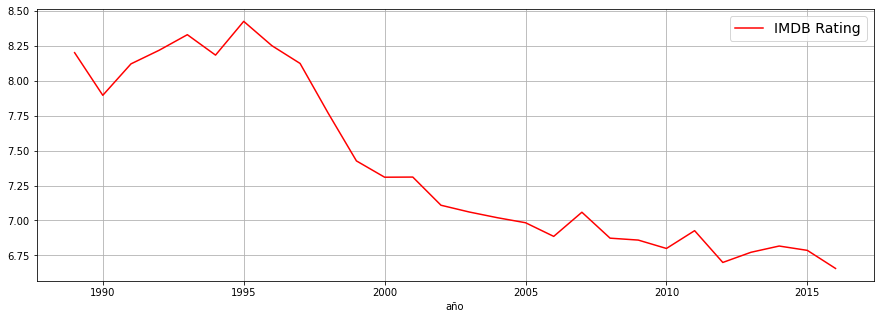

In [82]:
f, ax = plt.subplots(figsize=(15,5))
imdb_rating_yearly.plot(grid = True, subplots = True, kind = "line", color = "red", label="IMDB Rating")
ax.legend(fontsize = 14)

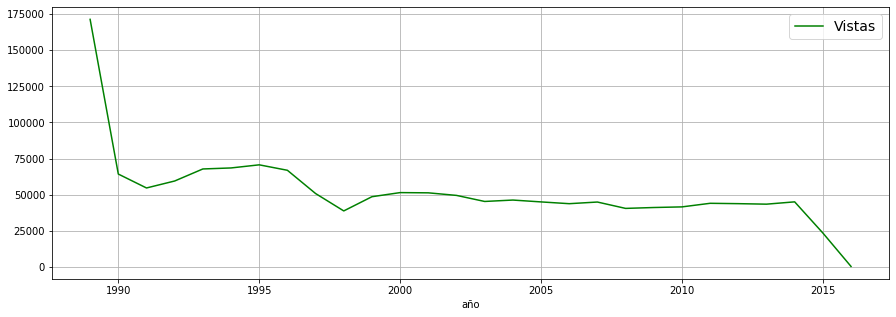

In [81]:
f, ax = plt.subplots(figsize=(15,5))
views_yearly.plot(grid = True, subplots = True, kind = "line", color = "green", label="Vistas")
ax.legend(fontsize = 14)

#### Si bien los datos son hasta 2016 se puede ver como la mayor cantidad de vistas/puntaje se da en la decada de los 90 y empieza a disminuir a finales de la decada.

### Cuando fue la ultima vez que Bart dijo "Comete mis calzones"?

In [12]:
last_eat_my_shorts_episode = simpsons_lines[(simpsons_lines["raw_character_text"] == "Bart Simpson") & (simpsons_lines["raw_text"].str.lower().str.contains("eat my shorts"))].sort_values(by="episode_id", ascending=False)["episode_id"].iloc[0]
simpsons_episodes[simpsons_episodes["id"] == last_eat_my_shorts_episode]["original_air_date"].iloc[0]

'2006-09-10'

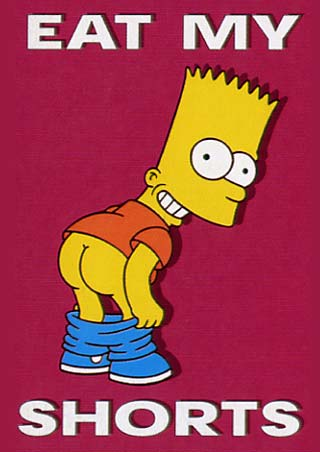

### Cuantas veces se quejo Marge?

In [13]:
groans = simpsons_lines[(simpsons_lines["raw_character_text"] == "Marge Simpson") & (simpsons_lines["raw_text"].str.lower().str.contains("groan"))].sum()["speaking_line"]
hmm = simpsons_lines[(simpsons_lines["raw_character_text"] == "Marge Simpson") & (simpsons_lines["raw_text"].str.lower().str.contains("hmm"))].sum()["speaking_line"]
groans + hmm

129

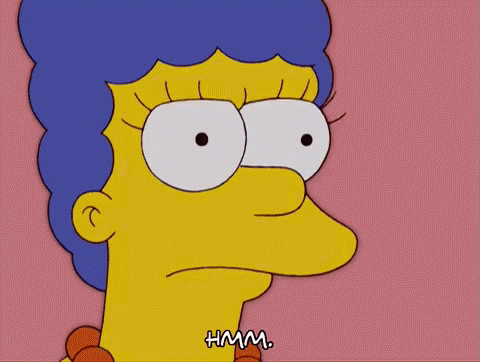

### Quizas por las veces que Homero fue con Moe

In [14]:
len(simpsons_lines[(simpsons_lines["raw_character_text"] == "Homer Simpson") & (simpsons_lines["raw_location_text"] == "Moe's Tavern")]["episode_id"].unique())

196

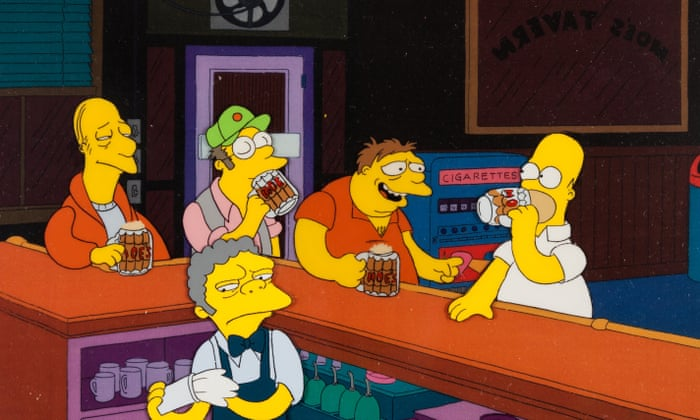